<a href="https://colab.research.google.com/github/mafervg/NFL-Predictions-and-betting-models/blob/main/NFL_PLAY_BY_PLAY_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nfl_data_py
!pip install pandas
!pip install os
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# pd.set_option('display.max_columns', None)

In [ ]:
pbp = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


In [ ]:
pbp.shape

(50147, 384)

In [ ]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0,0
1,43.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,None,None,NaN,None,NaN,47969;53059;42500;46279;53575;48364;46253;5460...,00-0036157;00-0035202;00-0037984;00-0029597;00...,00-0035537;00-0032134;00-0034419;00-0036500;00...,11,11
2,68.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
3,89.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 4 LB, 4 DB",4.0,53536;43586;42371;53443;42500;44999;43433;3309...,00-0036924;00-0032466;00-0032234;00-0036979;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
4,115.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11


In [ ]:
print(pbp.columns.tolist())

['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch', 'run_location', 'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result', 'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 'td_player_name', 'td_player_id', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'score_differential', 'posteam_score_post', 'defteam_score_post', 'score_differential

In [ ]:
pbp.dtypes

play_id            float32
game_id             object
old_game_id         object
home_team           object
away_team           object
                    ...   
players_on_play     object
offense_players     object
defense_players     object
n_offense            int32
n_defense            int32
Length: 384, dtype: object

In [ ]:
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_rp = pbp.dropna(subset = ['epa', 'posteam', 'defteam'])
pbp_rp.shape

(46427, 384)

In [ ]:
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa': 'pass_epa'})
pass_epa.sort_values('pass_epa', ascending=False)

,posteam,pass_epa
15,KC,0.280231
28,SF,0.179196
10,DET,0.174694
3,BUF,0.162691
6,CIN,0.149930
25,PHI,0.130672
14,JAX,0.110617
8,DAL,0.101407
19,MIA,0.087106
20,MIN,0.081581


In [ ]:
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa': 'rush_epa'})
rush_epa.sort_values('rush_epa', ascending=False)

,posteam,rush_epa
25,PHI,0.094366
2,BAL,0.015354
1,ATL,0.006186
26,PIT,0.005845
23,NYG,0.005760
7,CLE,0.004358
5,CHI,-0.002024
4,CAR,-0.006957
11,GB,-0.009453
15,KC,-0.021943


In [ ]:
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa.head()

,posteam,pass_epa,rush_epa
0,ARI,-0.079506,-0.079682
1,ATL,0.002979,0.006186
2,BAL,-0.010278,0.015354
3,BUF,0.162691,-0.052620
4,CAR,-0.063714,-0.006957


In [ ]:
logos = nfl.import_team_desc()
logos.head()

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


In [ ]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [ ]:
logo_paths = []
team_abbr = []

if not os.path.exists("logos"):
  os.makedirs("logos")

for team in range(len(logos)):
  urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
  logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
  team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr': team_abbr, 'logo_path': logo_paths}
logo_data = pd.DataFrame(data)

In [ ]:
logo_data.head()

,team_abbr,logo_path
0,ARI,logos/ARI.tif
1,ATL,logos/ATL.tif
2,BAL,logos/BAL.tif
3,BUF,logos/BUF.tif
4,CAR,logos/CAR.tif


In [ ]:
epa_with_logos = pd.merge(epa, logo_data, left_on='posteam', right_on='team_abbr')
epa_with_logos.head()

,posteam,pass_epa,rush_epa,team_abbr,logo_path
0,ARI,-0.079506,-0.079682,ARI,logos/ARI.tif
1,ATL,0.002979,0.006186,ATL,logos/ATL.tif
2,BAL,-0.010278,0.015354,BAL,logos/BAL.tif
3,BUF,0.162691,-0.052620,BUF,logos/BUF.tif
4,CAR,-0.063714,-0.006957,CAR,logos/CAR.tif


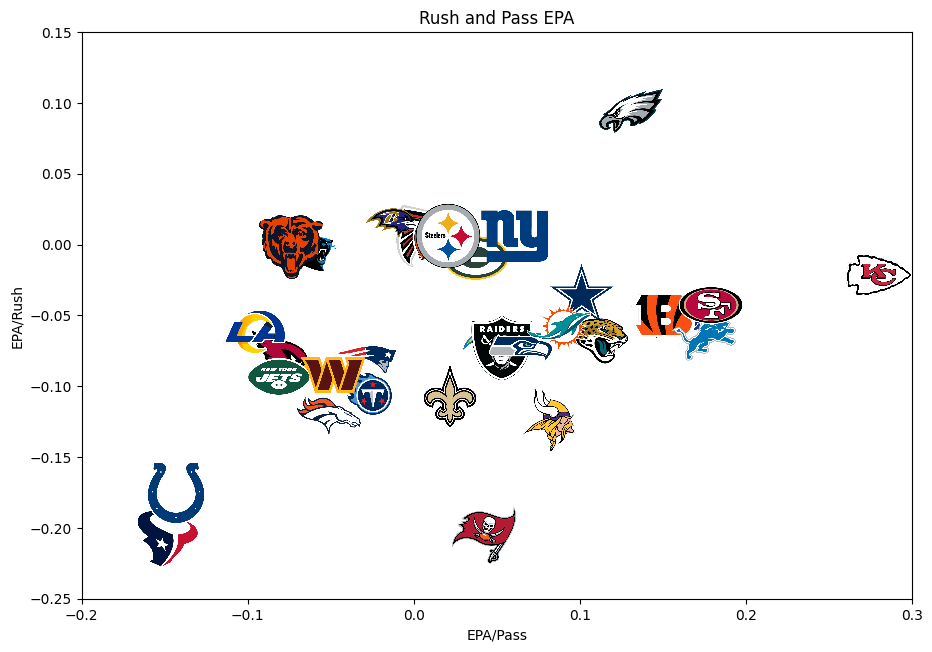

In [ ]:
plt.rcParams["figure.figsize"] = [10,7]
plt.rcParams['figure.autolayout'] = True

def getImage(path):
  return OffsetImage(plt.imread(path, format = 'tif'), zoom = .1)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x,y,paths):
  ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
  ax.add_artist(ab)

plt.xlim(-.2, .3)
plt.ylim(-0.25, .15)
plt.title("Rush and Pass EPA")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Rush")

plt.show()

In [ ]:
receiver_yac  = pbp_rp[(pbp_rp['pass'] == 1)].groupby('receiver_player_name').agg({'pass':'count', 'yards_after_catch': 'sum'}).reset_index()
receiver_yac.sort_values('yards_after_catch',ascending=False).head()

,receiver_player_name,pass,yards_after_catch
7,A.Ekeler,131,859.0
76,C.McCaffrey,122,756.0
466,T.Kelce,185,747.0
142,D.Samuel,116,648.0
232,J.Jefferson,194,620.0


In [ ]:
receiver_yac = receiver_yac[(receiver_yac['pass'] >= 100)]
receiver_yac.sort_values('yards_after_catch', inplace =True)
receiver_yac

,receiver_player_name,pass,yards_after_catch
87,C.Sutton,109,152.0
174,G.Davis,106,153.0
26,A.Thielen,113,157.0
130,D.Moore,118,182.0
80,C.Olave,120,210.0
143,D.Schultz,107,222.0
124,D.London,118,231.0
331,M.Evans,140,233.0
16,A.Lazard,101,248.0
125,D.Metcalf,156,262.0


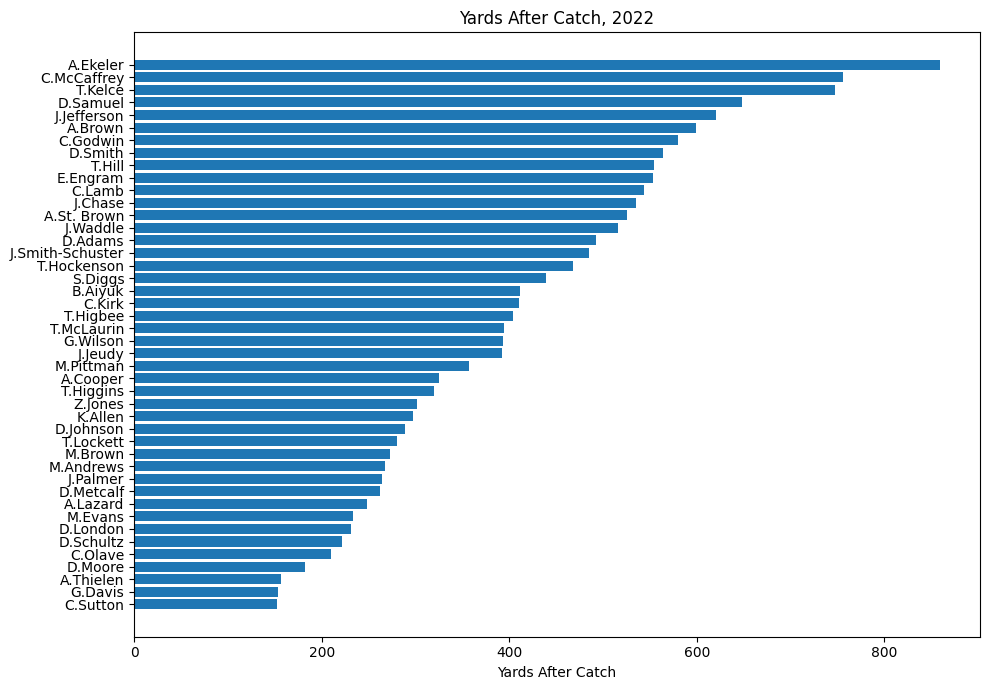

In [ ]:
name = receiver_yac['receiver_player_name']
yac = receiver_yac['yards_after_catch']

fig,ax = plt.subplots(figsize = [10, 7])

ax.barh(name, yac)
ax.set_title("Yards After Catch, 2022")
ax.set_xlabel("Yards After Catch")

plt.show()
